# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


607

## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [33]:


# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=tuktoyaktuk
Processing Record 2 | Bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=bredasdorp
Processing Record 3 | Tura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=tura
Processing Record 4 | Puerto Ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=puerto%20ayora
Processing Record 5 | Lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=lebu
Processing Record 6 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=punta%20arenas
Processing Record 7 | Melbourne
http://api.openweathermap.org/data/2.5/

Processing Record 56 | Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=arraial%20do%20cabo
Processing Record 57 | Bilibino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=bilibino
Processing Record 58 | Dubbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=dubbo
City not found. Skipping...
Processing Record 59 | Grindavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=grindavik
Processing Record 60 | Port Alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=port%20alfred
Processing Record 61 | Haines Junction
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=haines%20junction
Processing Record 62 | Butaritari
http://api.openweathermap.org/data/2

Processing Record 112 | Methóni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=methoni
Processing Record 113 | San Antonio Ilotenango
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=san%20antonio%20ilotenango
Processing Record 114 | Nantucket
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=nantucket
Processing Record 115 | Aykino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=aykino
Processing Record 116 | Isla Mujeres
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=isla%20mujeres
Processing Record 117 | Kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=kapaa
Processing Record 118 | Avarua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID

Processing Record 167 | Pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=pevek
Processing Record 168 | Esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=esperance
Processing Record 169 | Innisfail
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=innisfail
City not found. Skipping...
Processing Record 170 | Gonzales
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=gonzales
City not found. Skipping...
Processing Record 171 | Pathein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=pathein
Processing Record 172 | Monterey
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=monterey
Processing Record 173 | Portlethen
http://api.openweathermap.org/data/2.5/weat

Processing Record 222 | Mil'kovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=milkovo
Processing Record 223 | Tautira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=tautira
Processing Record 224 | Egyek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=egyek
Processing Record 225 | Sabang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=sabang
Processing Record 226 | Praia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=praia
Processing Record 227 | Namatanai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=namatanai
City not found. Skipping...
Processing Record 228 | Saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd9

Processing Record 278 | El Fuerte
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=el%20fuerte
Processing Record 279 | Bouloupari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=bouloupari
Processing Record 280 | College
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=college
Processing Record 281 | George Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=georgetown
Processing Record 282 | Naryan-Mar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=naryan-mar
Processing Record 283 | Tornio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=tornio
Processing Record 284 | Mehamn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981

Processing Record 334 | Vanimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=vanimo
Processing Record 335 | Touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=touros
Processing Record 336 | Paso de los Toros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=paso%20de%20los%20toros
Processing Record 337 | São Gabriel da Cachoeira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=sao%20gabriel%20da%20cachoeira
Processing Record 338 | Broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=broome
Processing Record 339 | Baley
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=baley
Processing Record 340 | Quang Ngai
http://api.openweathermap.org/data/2.5/weather?unit

Processing Record 390 | Karratha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=karratha
Processing Record 391 | Amapá
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=amapa
City not found. Skipping...
Processing Record 392 | Anadyr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=anadyr
Processing Record 393 | Tudela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=tudela
Processing Record 394 | Bandarbeyla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=bandarbeyla
Processing Record 395 | San Patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=san%20patricio
Processing Record 396 | Luanda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d

City not found. Skipping...
Processing Record 445 | Shimoda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=shimoda
Processing Record 446 | Newport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=newport
Processing Record 447 | Likasi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=likasi
Processing Record 448 | Makat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=makat
City not found. Skipping...
Processing Record 449 | Cururupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=cururupu
Processing Record 450 | Puerto Escondido
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=puerto%20escondido
Processing Record 451 | Monaghan
http://api.openweathermap.org/data/2.

Processing Record 501 | Half Moon Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=half%20moon%20bay
Processing Record 502 | San Policarpo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=san%20policarpo
Processing Record 503 | Santo Tomas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=santo%20tomas
Processing Record 504 | Navalmoral de la Mata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=navalmoral%20de%20la%20mata
Processing Record 505 | Odesa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=odessa
Processing Record 506 | Sola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d14c34d6386272cbd981ba79f1b2985d&q=sola
Processing Record 507 | Numāligarh
http://api.openweathermap.org/data/2.5/wea

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
output_data_file = "output_data/cities.csv"
# Save data frame to .y with the lists generated
weatherpy_dict = {0
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          548
Cloudiness    548
Country       548
Date          548
Humidity      548
Lat           548
Lng           548
Max Temp      548
Wind Speed    548
dtype: int64

In [27]:


# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tuktoyaktuk,90,CA,1622045815,93,69.4541,-133.0374,26.60,4.61
1,Bredasdorp,87,ZA,1622045816,79,-34.5322,20.0403,58.28,3.29
2,Tura,95,IN,1622045817,90,25.5198,90.2201,72.37,5.26
3,Puerto Ayora,26,EC,1622045558,87,-0.7393,-90.3518,82.36,5.99
4,Lebu,98,CL,1622045820,86,-37.6167,-73.6500,59.40,7.34


In [28]:
weather_data.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,548.000000,5.480000e+02,548.000000,548.000000,548.000000,548.000000,548.000000
mean,55.291971,1.622046e+09,67.000000,19.387117,17.370646,66.829434,8.192336
std,37.932281,2.459329e+02,21.535821,33.669557,91.218647,17.707832,5.938993
min,0.000000,1.622046e+09,9.000000,-54.800000,-175.200000,17.980000,0.000000
25%,20.000000,1.622046e+09,55.000000,-8.905000,-65.024025,53.327500,3.890000
50%,58.500000,1.622046e+09,71.000000,22.787100,22.052950,69.280000,6.700000
75%,95.000000,1.622046e+09,84.000000,47.636700,99.130225,80.740000,11.087500
max,100.000000,1.622047e+09,100.000000,78.218600,179.316700,105.640000,37.310000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [29]:
weather_data.loc[weather_data.Humidity > 100]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [30]:
#  Get the indices of cities that have humidity over 100%.
weather_data.loc[weather_data.Humidity < 100]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tuktoyaktuk,90,CA,1622045815,93,69.4541,-133.0374,26.60,4.61
1,Bredasdorp,87,ZA,1622045816,79,-34.5322,20.0403,58.28,3.29
2,Tura,95,IN,1622045817,90,25.5198,90.2201,72.37,5.26
3,Puerto Ayora,26,EC,1622045558,87,-0.7393,-90.3518,82.36,5.99
4,Lebu,98,CL,1622045820,86,-37.6167,-73.6500,59.40,7.34
...,...,...,...,...,...,...,...,...,...
543,Batagay-Alyta,79,RU,1622046621,71,67.8006,130.4114,42.19,4.23
544,Tabuk,46,PH,1622046623,82,17.4189,121.4443,78.28,2.24
545,Teseney,50,ER,1622046625,14,15.1100,36.6575,102.09,7.96
546,Santee,20,US,1622046562,71,32.8384,-116.9739,77.04,0.00


In [49]:

outlies = weather_data.loc[weather_data.Humidity > 100 ].index

In [51]:
clean_city_data = weather_data.drop(outlies, inplace= False)
clean_city_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tuktoyaktuk,90,CA,1622045815,93,69.4541,-133.0374,26.60,4.61
1,Bredasdorp,87,ZA,1622045816,79,-34.5322,20.0403,58.28,3.29
2,Tura,95,IN,1622045817,90,25.5198,90.2201,72.37,5.26
3,Puerto Ayora,26,EC,1622045558,87,-0.7393,-90.3518,82.36,5.99
4,Lebu,98,CL,1622045820,86,-37.6167,-73.6500,59.40,7.34


In [21]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

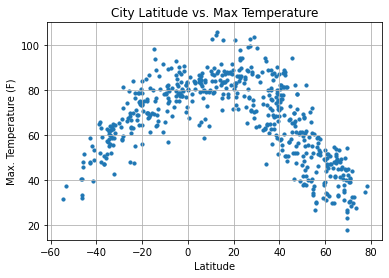

In [43]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Show plot
plt.show()


## Latitude vs. Humidity Plot

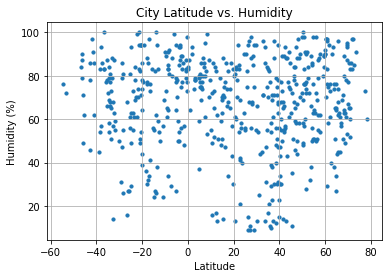

In [44]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

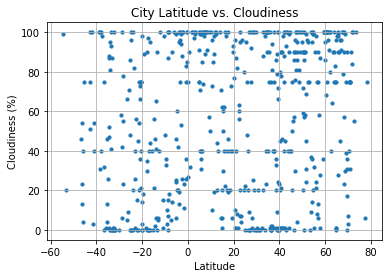

In [52]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)



# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

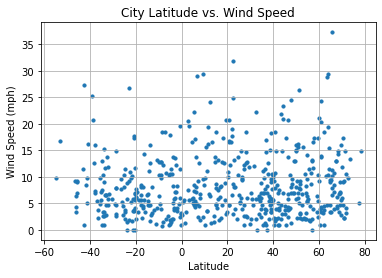

In [54]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)




# Show plot
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.3386637095329284
The equation of the regression line is: y = -0.64x + 62.42


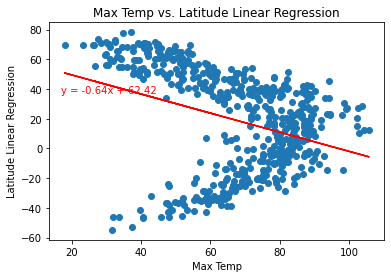

In [56]:
from scipy.stats import linregress
x_values = weather_data["Max Temp"]
                       
y_values = weather_data["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=10,color="red")
plt.title("Max Temp vs. Latitude Linear Regression")
plt.xlabel("Max Temp")
plt.ylabel("Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


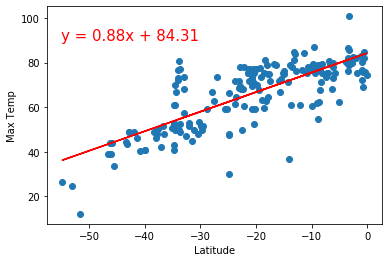

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


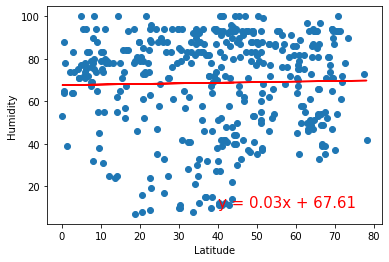

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


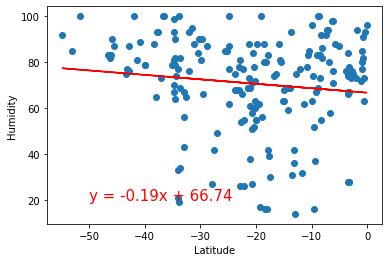

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


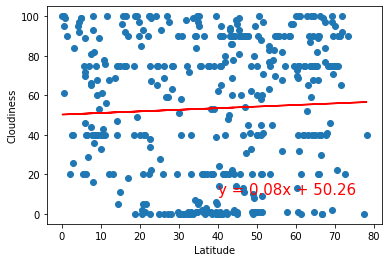

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


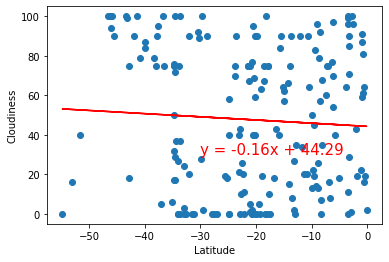

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


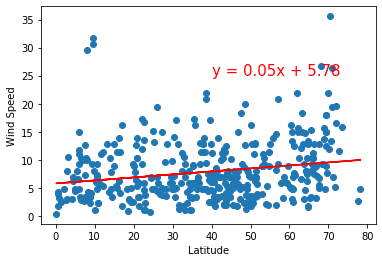

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


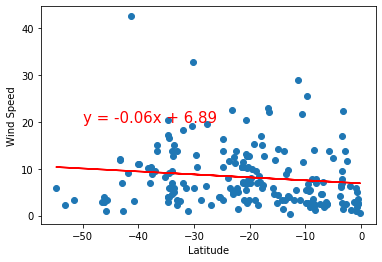